In [ ]:
# from psutil import virtual_memory
# ram_gb = virtual_memory().total / 1e9
# print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))
 
# if ram_gb < 20:
#   print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
#   print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
#   print('re-execute this cell.')
# else:
#   print('You are using a high-RAM runtime!')

In [ ]:
# gpu_info = !nvidia-smi
# gpu_info = '\n'.join(gpu_info)
# if gpu_info.find('failed') >= 0:
#   print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
#   print('and then re-execute this cell.')
# else:
#   print(gpu_info)

In [ ]:
!pip install pycm

     |████████████████████████████████| 61kB 2.8MB/s 
     |████████████████████████████████| 552kB 11.1MB/s 


In [ ]:
# %tensorflow_version 1.x
import tensorflow as tf
import os
import h5py
from PIL import Image
import numpy as np
from keras.utils import np_utils
from skimage import io
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img
from pycm import *
import random,os,glob

print(tf.__version__)


2.3.0


In [ ]:

locacion='/content/drive/My Drive/basura/batch/train/*/*'
location2='/content/drive/My Drive/basura/batch/clasificacion_basura/*/*'
# locacion='/content/drive/My Drive/basura/batch_new/*/*'
img_list = glob.glob(locacion)
img_list2= glob.glob(location2)
print(len(img_list))
print(len(img_list2))
# # carton_directorio_train="/content/drive/My Drive/basura/batch/train/cardboard"
# # vidrio_directorio_train="/content/drive/My Drive/basura/batch/train/glass"
# # metal_directorio_train="/content/drive/My Drive/basura/batch/train/metal"
# # papel_directorio_train="/content/drive/My Drive/basura/batch/train/paper"
# # plastico_directorio_train="/content/drive/My Drive/basura/batch/train/plastic"
# # basura_directorio_train="/content/drive/My Drive/basura/batch/train/trash"



# # base=h5py.File("/content/drive/My Drive/basura/data.h5","w")
# # carton_directorio_test="/content/drive/My Drive/basura/test/cardboard"
# # vidrio_directorio_test="/content/drive/My Drive/basura/test/glass"
# # metal_directorio_test="/content/drive/My Drive/basura/test/metal"
# # papel_directorio_test="/content/drive/My Drive/basura/test/paper"
# # plastico_directorio_test="/content/drive/My Drive/basura/test/plastic"
# # basura_directorio_test="/content/drive/My Drive/basura/test/trash"



# # carton_directorio_valid="/content/drive/My Drive/basura/valido/cardboard"
# # vidrio_directorio_valid="/content/drive/My Drive/basura/valido/glass"
# # metal_directorio_valid="/content/drive/My Drive/basura/valido/metal"
# # papel_directorio_valid="/content/drive/My Drive/basura/valido/paper"
# # plastico_directorio_valid="/content/drive/My Drive/basura/valido/plastic"
# # basura_directorio_valid="/content/drive/My Drive/basura/valido/trash"


# directorios_train=[carton_directorio_train,vidrio_directorio_train,
#                    metal_directorio_train,papel_directorio_train,
#                    plastico_directorio_train,basura_directorio_train]


# # directorios_test=[carton_directorio_test,vidrio_directorio_test,
# #                   metal_directorio_test,papel_directorio_test,
# #                   plastico_directorio_test,basura_directorio_test]


# # directorios_valid=[carton_directorio_valid,vidrio_directorio_valid,
# #                    metal_directorio_valid,papel_directorio_valid,
# #                    plastico_directorio_valid,basura_directorio_valid]


# pre_train=[os.listdir(carton_directorio_train),os.listdir(vidrio_directorio_train),
#            os.listdir(metal_directorio_train),os.listdir(papel_directorio_train),
#            os.listdir(plastico_directorio_train),os.listdir(basura_directorio_train)]


# # pre_test=[os.listdir(carton_directorio_test),os.listdir(vidrio_directorio_test),
# #           os.listdir(metal_directorio_test),os.listdir(papel_directorio_test),
# #           os.listdir(plastico_directorio_test),os.listdir(basura_directorio_test)]


# # pre_valid=[os.listdir(carton_directorio_valid),os.listdir(vidrio_directorio_valid),
# #            os.listdir(metal_directorio_valid),os.listdir(papel_directorio_valid),
# #            os.listdir(plastico_directorio_valid),os.listdir(basura_directorio_valid)]


# # X_valid=[]
# # Y_valid=[]


# # X_train=[]
# # Y_train=[]

# # X_test=[]
# # Y_test=[]


# data=[]
# value=[]
# # f=open("/content/drive/My Drive/basura/imagenes.csv","w")
# c=0
# for i in pre_train:
#     for j in i:
#         ruta="{}/{}".format(directorios_train[c],j)
#         # img=np.asarray(Image.open(ruta).convert("RGB"))/255
#         # img=io.imread(ruta)/255
#         # base[j]=img
#         # linea=list(np.ravel(img))
#         # linea.append(c)
#         # conversion=map(str,linea)
#         # f.write("{}\n".format(",".join(conversion)))
#         # data.append(img)
#         data.append(ruta)
#         value.append(c)
#     c+=1
#     print(c)


12570
2400


In [ ]:
validationsplit=0.1
train=ImageDataGenerator(horizontal_flip=True,
                         vertical_flip=True,
                         validation_split=validationsplit,
                         rescale=1./255,
                         shear_range = 0.1,
                         zoom_range = 0.1,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1)

test=ImageDataGenerator(rescale=1/255,
                        validation_split=validationsplit)

dir_f='../content/drive/My Drive/basura/batch/train'


train_generator=train.flow_from_directory(dir_f,
                                          target_size=(200,200),
                                          batch_size=32,
                                          class_mode='categorical',
                                          subset='training',seed=10)

test_generator=test.flow_from_directory(dir_f,
                                        target_size=(200,200),
                                        batch_size=32,
                                        class_mode='categorical',
                                        subset='validation',seed=10)







labels = (train_generator.class_indices)
print(labels)

print("\n")

# labels2 = (train_generator_2400.class_indices)
# print(labels2)

print("\n")

labels = dict((v,k) for k,v in labels.items())
print(labels)



# labels2 = dict((v,k) for k,v in labels2.items())
# print(labels2)


Found 11316 images belonging to 6 classes.
Found 1254 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}




{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [ ]:
# for image_batch, label_batch in train_generator:
#   break
# image_batch.shape, label_batch.shape

# print("\n")

# for image_batch2, label_batch2 in train_generator_2400:
#   break
# image_batch2.shape, label_batch2.shape




((32, 200, 200, 3), (32, 6))

In [ ]:
def model_level():
    model=tf.keras.models.Sequential()
    # model.add(tf.keras.layers.Conv2D(128,(5,5), input_shape=(384,512,3), activation="relu",data_format='channels_last'))
    # model.add(tf.keras.layers.MaxPooling2D())
    # model.add(tf.keras.layers.Conv2D(64,(3,3), activation="relu"))
    # model.add(tf.keras.layers.Conv2D(32,(3,3), activation="relu"))
    # model.add(tf.keras.layers.Conv2D(16,(3,2), activation="relu"))
    # model.add(tf.keras.layers.MaxPooling2D())
    # model.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu'))
    # model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu'))
    # model.add(tf.keras.layers.MaxPooling2D())
    # model.add(tf.keras.layers.Flatten())
    # model.add(tf.keras.layers.Dense(75,activation="relu"))
    # model.add(tf.keras.layers.Dropout(rate=0.2))
    # model.add(tf.keras.layers.Dense(25,activation="relu"))
    # model.add(tf.keras.layers.Dropout(rate=0.5))
    # model.add(tf.keras.layers.Dense(clase,activation='softmax'))
    model.add(tf.keras.layers.Conv2D(64,(4,4),input_shape=(200,200,3),activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2)) 
    model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu')) 
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu')) 
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64,activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.3))
    model.add(tf.keras.layers.Dense(32,activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.15))
    model.add(tf.keras.layers.Dense(6,activation='softmax'))
    return model


filepath="/content/drive/My Drive/basura/modelo_reciente_12000/model_best.h5"
checkpoint1 = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=2, save_best_only=True, mode='max')
callbacks_list = [checkpoint1]



filepath2="/content/drive/My Drive/basura/mode_2400/model_best.h5"
checkpoint2 = tf.keras.callbacks.ModelCheckpoint(filepath2, monitor='val_acc', verbose=2, save_best_only=True, mode='max')
callbacks_list2= [checkpoint2]



In [ ]:
model = model_level()
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 197, 197, 64)      3136      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16928)             0

In [ ]:
import matplotlib.pyplot as plt
# from keras.backend.tensorflow_backend import set_session
config = tf.compat.v1.ConfigProto()
# config=tf.ConfigProto()
config.gpu_options.allow_growth = True


In [ ]:
spit_data=validationsplit



with tf.device('/device:GPU:0'):
    #opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['acc'])
    # history=model.fit(X_train,Y_train,validation_data=(X_test,Y_test), batch_size=130, epochs=40,verbose=1,callbacks=callbacks_list)
    # history=model.fit_generator(trained_data,steps_per_epoch=len(X_train)//32,validation_data=test_data,validation_steps=550//32,epochs=50,verbose=1)
    history=model.fit(train_generator,
                                 epochs=40,
                                 steps_per_epoch=(len(img_list)*(1-spit_data))//32,
                                 validation_data=test_generator,
                                 validation_steps=(len(img_list)*(spit_data))//32,
                                 callbacks=callbacks_list) 
    
    # history=model.fit_generator(train_generator,
    #                              epochs=40,
    #                              steps_per_epoch=(len(img_list)*(1-spit_data))//32,
    #                              validation_data=test_generator,
    #                              validation_steps=(len(img_list)*(spit_data))//32,
    #                              workers = 4,
    #                              callbacks=callbacks_list) 
    # scores = model.evaluate(X_test,Y_test,verbose=1,batch_size=30)
    # print("Large CNN Error: {0:.4f}% accuracy:{1:.4f}%".format((100-scores[1] * 100),scores[1]*100))

    model_json = model.to_json()
    with open("/content/drive/My Drive/basura/modelo_reciente_12000/model_t.json","w") as json_file:
        json_file.write(model_json)
    model.save_weights('/content/drive/My Drive/basura/modelo_reciente_12000/model_last.h5')



Epoch 1/40
353/353 [==============================] - ETA: 0s - loss: 1.7024 - acc: 0.2632 
Epoch 00001: val_acc improved from -inf to 0.42708, saving model to /content/drive/My Drive/basura/modelo_reciente_12000/model_best.h5
353/353 [==============================] - 5178s 15s/step - loss: 1.7024 - acc: 0.2632 - val_loss: 1.4837 - val_acc: 0.4271
Epoch 2/40
353/353 [==============================] - ETA: 0s - loss: 1.4320 - acc: 0.4286
Epoch 00002: val_acc improved from 0.42708 to 0.46314, saving model to /content/drive/My Drive/basura/modelo_reciente_12000/model_best.h5
353/353 [==============================] - 101s 285ms/step - loss: 1.4320 - acc: 0.4286 - val_loss: 1.3546 - val_acc: 0.4631
Epoch 3/40
353/353 [==============================] - ETA: 0s - loss: 1.3202 - acc: 0.4871
Epoch 00003: val_acc improved from 0.46314 to 0.52644, saving model to /content/drive/My Drive/basura/modelo_reciente_12000/model_best.h5
353/353 [==============================] - 100s 284ms/step - loss:

In [ ]:
# loaded=model.load_weights("/content/drive/My Drive/basura/model_best.h5")
# scores = model.evaluate(X_test,Y_test,verbose=1,batch_size=30)

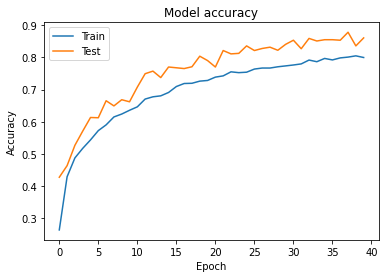

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('/content/drive/My Drive/basura/modelo_reciente_12000/accuracy.png')
plt.show()

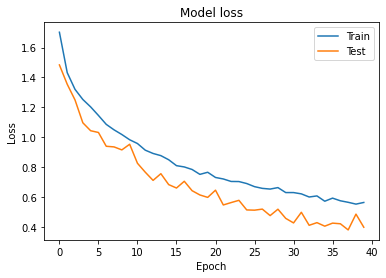

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper right')
plt.savefig('/content/drive/My Drive/basura/modelo_reciente_12000/loss.png')
plt.show()  


In [ ]:
# print(X_train.shape)

In [ ]:
# gpu_info = !nvidia-smi
# gpu_info = '\n'.join(gpu_info)
# if gpu_info.find('failed') >= 0:
#   print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
#   print('and then re-execute this cell.')
# else:
#   print(gpu_info)

In [ ]:
carton_directorio_valid="/content/drive/My Drive/basura/validacion_batch/cardboard"
vidrio_directorio_valid="/content/drive/My Drive/basura/validacion_batch/glass"
metal_directorio_valid="/content/drive/My Drive/basura/validacion_batch/metal"
papel_directorio_valid="/content/drive/My Drive/basura/validacion_batch/paper"
plastico_directorio_valid="/content/drive/My Drive/basura/validacion_batch/plastic"
basura_directorio_valid="/content/drive/My Drive/basura/validacion_batch/trash"

directorios_valid=[carton_directorio_valid,vidrio_directorio_valid,
                   metal_directorio_valid,papel_directorio_valid,
                   plastico_directorio_valid,basura_directorio_valid]

pre_valid=[os.listdir(carton_directorio_valid),os.listdir(vidrio_directorio_valid),
           os.listdir(metal_directorio_valid),os.listdir(papel_directorio_valid),
           os.listdir(plastico_directorio_valid),os.listdir(basura_directorio_valid)]


X_valid=[]
Y_valid=[]

c=0
for i in pre_valid:
  for j in i:
     ruta="{}/{}".format(directorios_valid[c],j)
     img=io.imread(ruta)/255
     X_valid.append(img)
     Y_valid.append(c)
  c+=1



In [ ]:
json_file = open('/content/drive/My Drive/basura/modelo_reciente_12000/model_t.json','r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)
# cargar pesos al nuevo modelo
loaded_model.load_weights('/content/drive/My Drive/basura/modelo_reciente_12000/model_last.h5')
print("Cargado modelo desde disco.")

with tf.device('/device:GPU:0'):

  # Compilar modelo cargado y listo para usar.
  loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  X_valid=np.array(X_valid)
  ynew = np.around(loaded_model.predict(X_valid))
  for i,j in enumerate(ynew):
    print(i,j)




Cargado modelo desde disco.
0 [0. 0. 0. 0. 0. 1.]
1 [1. 0. 0. 0. 0. 0.]
2 [1. 0. 0. 0. 0. 0.]
3 [1. 0. 0. 0. 0. 0.]
4 [1. 0. 0. 0. 0. 0.]
5 [0. 0. 0. 0. 0. 0.]
6 [0. 0. 0. 0. 0. 0.]
7 [1. 0. 0. 0. 0. 0.]
8 [1. 0. 0. 0. 0. 0.]
9 [1. 0. 0. 0. 0. 0.]
10 [0. 1. 0. 0. 0. 0.]
11 [0. 0. 1. 0. 0. 0.]
12 [0. 1. 0. 0. 0. 0.]
13 [0. 1. 0. 0. 0. 0.]
14 [0. 1. 0. 0. 0. 0.]
15 [0. 1. 0. 0. 0. 0.]
16 [0. 0. 1. 0. 0. 0.]
17 [0. 1. 0. 0. 0. 0.]
18 [0. 0. 0. 0. 0. 0.]
19 [0. 1. 0. 0. 0. 0.]
20 [0. 0. 1. 0. 0. 0.]
21 [0. 0. 0. 0. 0. 0.]
22 [0. 1. 0. 0. 0. 0.]
23 [0. 0. 1. 0. 0. 0.]
24 [0. 0. 1. 0. 0. 0.]
25 [0. 0. 1. 0. 0. 0.]
26 [0. 0. 1. 0. 0. 0.]
27 [0. 0. 1. 0. 0. 0.]
28 [0. 0. 0. 0. 0. 0.]
29 [0. 0. 1. 0. 0. 0.]
30 [0. 0. 0. 1. 0. 0.]
31 [0. 0. 0. 1. 0. 0.]
32 [0. 0. 0. 1. 0. 0.]
33 [0. 0. 0. 1. 0. 0.]
34 [0. 0. 0. 1. 0. 0.]
35 [0. 0. 0. 1. 0. 0.]
36 [0. 0. 0. 1. 0. 0.]
37 [0. 0. 0. 1. 0. 0.]
38 [0. 0. 1. 0. 0. 0.]
39 [0. 0. 0. 1. 0. 0.]
40 [0. 1. 0. 0. 0. 0.]
41 [0. 0. 0. 0. 1. 0.]
42 [0. 0. 0. 0. 

In [ ]:
yt=np_utils.to_categorical(np.array(Y_valid))
scores = model.evaluate(np.array(X_valid),yt,verbose=1,batch_size=10)

6/6 [==============================] - 0s 5ms/step - loss: 0.7483 - acc: 0.7500


In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd
# from itertools import product
# from sklearn.metrics import classification_report, confusion_matrix
# import numpy as np

# y_test_non_category = [ np.argmax(t) for t in Y_test ]
# y_predict= [ np.argmax(t) for t in model.predict(X_test) ]
# cf= confusion_matrix(y_test_non_category, y_predict)
# print(cf)


# print(np.bincount(y_predict))

# exp_series = pd.Series(Y_valid)
# pred_series=pd.Series(y_predict)

# plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
# plt.colorbar()
# plt.title('Confusion Matrix Trash NN')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# tick_marks = np.arange(len(set(exp_series))) # length of classes
# class_labels = ['cardboard','glass','metal','papel','plastico','basura']
# tick_marks
# plt.xticks(tick_marks,class_labels,rotation=-45)
# plt.yticks(tick_marks,class_labels)
# # plotting text value inside cells
# thresh = cf.max() / 2.
# for i,j in product(range(cf.shape[0]),range(cf.shape[1])):
#     plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
# plt.savefig('/content/drive/My Drive/basura/modelo_reciente_12000/matrix_confusion_red.png')
# plt.show();

[[9 0 0 0 0 1]
 [1 7 2 0 0 0]
 [2 1 7 0 0 0]
 [0 0 1 9 0 0]
 [2 2 0 0 6 0]
 [3 0 1 1 0 5]]
Predict 0       1       2       3       4       5       
Actual
0       9       0       0       0       0       1       

1       1       7       2       0       0       0       

2       2       1       7       0       0       0       

3       0       0       1       9       0       0       

4       2       2       0       0       6       0       

5       3       0       1       1       0       5       





Overall Statistics : 

95% CI                                                            (0.60264,0.83069)
ACC Macro                                                         0.90556
ARI                                                               0.40549
AUNP                                                              0.83
AUNU                                                              0.83
Bangdiwala B                                                      0.535
Bennett S               

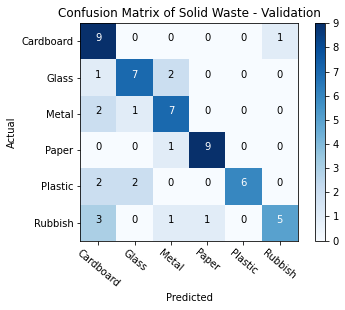

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from itertools import product
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_test_non_category = Y_valid
y_predict= [ np.argmax(t) for t in ynew ]
cf= confusion_matrix(y_test_non_category,y_predict)
print(cf)
cm1 = ConfusionMatrix(actual_vector=y_test_non_category, predict_vector=y_predict)
print(cm1)
print(cm1.position())
cm1.save_html("/content/drive/My Drive/basura/cm1")
print(np.bincount(y_predict))

exp_series = pd.Series(Y_valid)
pred_series=pd.Series(y_predict)

plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix of Solid Waste - Validation')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(set(exp_series))) # length of classes
class_labels = ['Cardboard','Glass','Metal','Paper','Plastic','Rubbish']
tick_marks
plt.xticks(tick_marks,class_labels,rotation=-40)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf.max() / 2.
for i,j in product(range(cf.shape[0]),range(cf.shape[1])):
    plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.savefig('/content/drive/My Drive/basura/modelo_reciente_12000/matrix_confusion_validacion.png')
plt.show();

In [ ]:
dir_f_2='../content/drive/My Drive/basura/batch/clasificacion_basura'

train_generator_2400=train.flow_from_directory(dir_f_2,
                                          target_size=(200,200),
                                          batch_size=32,
                                          class_mode='categorical',
                                          subset='training',seed=10)

test_generator_2400=test.flow_from_directory(dir_f_2,
                                        target_size=(200,200),
                                        batch_size=32,
                                        class_mode='categorical',
                                        subset='validation',seed=10)


Found 2160 images belonging to 6 classes.
Found 240 images belonging to 6 classes.


In [ ]:
spit_data=0.1
with tf.device('/device:GPU:0'):
    #opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['acc'])
    # history=model.fit(X_train,Y_train,validation_data=(X_test,Y_test), batch_size=130, epochs=40,verbose=1,callbacks=callbacks_list)
    # history=model.fit_generator(trained_data,steps_per_epoch=len(X_train)//32,validation_data=test_data,validation_steps=550//32,epochs=50,verbose=1)
    history2=model.fit(train_generator_2400,
                                 epochs=40,
                                 steps_per_epoch=(len(img_list2)*(1-spit_data))//32,
                                 validation_data=test_generator_2400,
                                 validation_steps=(len(img_list2)*(spit_data))//32,
                                 callbacks=callbacks_list2) 
    
    # history=model.fit_generator(train_generator,
    #                              epochs=40,
    #                              steps_per_epoch=(len(img_list)*(1-spit_data))//32,
    #                              validation_data=test_generator,
    #                              validation_steps=(len(img_list)*(spit_data))//32,
    #                              workers = 4,
    #                              callbacks=callbacks_list) 
    # scores = model.evaluate(X_test,Y_test,verbose=1,batch_size=30)
    # print("Large CNN Error: {0:.4f}% accuracy:{1:.4f}%".format((100-scores[1] * 100),scores[1]*100))

    model_json = model.to_json()
    with open("/content/drive/My Drive/basura/mode_2400/model_t.json","w") as json_file:
        json_file.write(model_json)
    model.save_weights('/content/drive/My Drive/basura/mode_2400/model_last.h5')


Epoch 1/40
67/67 [==============================] - ETA: 0s - loss: 1.7892 - acc: 0.1856 
Epoch 00001: val_acc improved from -inf to 0.26339, saving model to /content/drive/My Drive/basura/mode_2400/model_best.h5
67/67 [==============================] - 1266s 19s/step - loss: 1.7892 - acc: 0.1856 - val_loss: 1.7223 - val_acc: 0.2634
Epoch 2/40
67/67 [==============================] - ETA: 0s - loss: 1.7348 - acc: 0.2232
Epoch 00002: val_acc improved from 0.26339 to 0.28125, saving model to /content/drive/My Drive/basura/mode_2400/model_best.h5
67/67 [==============================] - 139s 2s/step - loss: 1.7348 - acc: 0.2232 - val_loss: 1.6165 - val_acc: 0.2812
Epoch 3/40
67/67 [==============================] - ETA: 0s - loss: 1.6070 - acc: 0.3148
Epoch 00003: val_acc improved from 0.28125 to 0.37946, saving model to /content/drive/My Drive/basura/mode_2400/model_best.h5
67/67 [==============================] - 138s 2s/step - loss: 1.6070 - acc: 0.3148 - val_loss: 1.4740 - val_acc: 0.

In [ ]:
import matplotlib.pyplot as plt

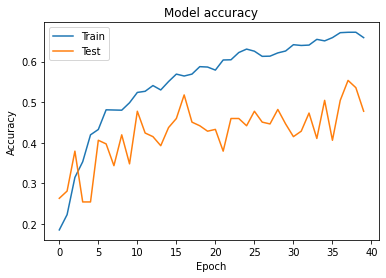

In [ ]:
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.savefig('/content/drive/My Drive/basura/mode_2400/accuracy.png')
plt.show()

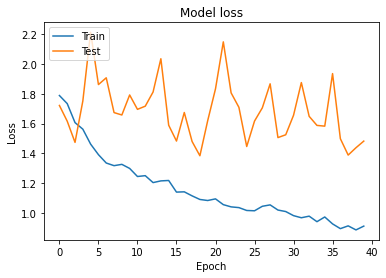

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.savefig('/content/drive/My Drive/basura/mode_2400/loss.png')
plt.show()  


In [ ]:
json_file2= open('/content/drive/My Drive/basura/mode_2400/model_t.json','r')
loaded_model_json2= json_file2.read()
json_file2.close()
loaded_model2= tf.keras.models.model_from_json(loaded_model_json2)
# cargar pesos al nuevo modelo
loaded_model2.load_weights('/content/drive/My Drive/basura/mode_2400/model_last.h5')
print("Cargado modelo desde disco.")
X_valid=np.array(X_valid)
with tf.device('/device:GPU:0'):

  # Compilar modelo cargado y listo para usar.
  loaded_model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  ynew2= np.around(loaded_model2.predict(X_valid))
  for i,j in enumerate(ynew2):
    print(i,j)


Cargado modelo desde disco.
0 [0. 0. 0. 0. 0. 0.]
1 [1. 0. 0. 0. 0. 0.]
2 [0. 0. 0. 0. 0. 0.]
3 [1. 0. 0. 0. 0. 0.]
4 [1. 0. 0. 0. 0. 0.]
5 [1. 0. 0. 0. 0. 0.]
6 [0. 0. 0. 0. 0. 0.]
7 [1. 0. 0. 0. 0. 0.]
8 [1. 0. 0. 0. 0. 0.]
9 [1. 0. 0. 0. 0. 0.]
10 [0. 0. 1. 0. 0. 0.]
11 [0. 0. 0. 0. 0. 0.]
12 [0. 0. 0. 0. 0. 0.]
13 [0. 0. 0. 0. 0. 0.]
14 [0. 0. 0. 0. 0. 0.]
15 [0. 1. 0. 0. 0. 0.]
16 [0. 0. 0. 0. 0. 0.]
17 [0. 0. 1. 0. 0. 0.]
18 [0. 0. 0. 0. 0. 0.]
19 [0. 1. 0. 0. 0. 0.]
20 [0. 0. 0. 1. 0. 0.]
21 [0. 0. 0. 0. 0. 0.]
22 [0. 0. 0. 0. 0. 0.]
23 [0. 0. 1. 0. 0. 0.]
24 [0. 0. 1. 0. 0. 0.]
25 [0. 1. 0. 0. 0. 0.]
26 [0. 0. 0. 0. 0. 0.]
27 [0. 0. 1. 0. 0. 0.]
28 [0. 0. 0. 0. 0. 0.]
29 [0. 0. 0. 0. 0. 0.]
30 [0. 0. 0. 1. 0. 0.]
31 [0. 0. 0. 1. 0. 0.]
32 [0. 0. 0. 1. 0. 0.]
33 [0. 0. 0. 1. 0. 0.]
34 [0. 0. 0. 1. 0. 0.]
35 [0. 0. 0. 1. 0. 0.]
36 [0. 0. 0. 1. 0. 0.]
37 [0. 0. 0. 1. 0. 0.]
38 [0. 0. 0. 1. 0. 0.]
39 [0. 0. 0. 1. 0. 0.]
40 [0. 1. 0. 0. 0. 0.]
41 [0. 0. 0. 0. 1. 0.]
42 [0. 0. 0. 0. 

[[10  0  0  0  0  0]
 [ 6  2  2  0  0  0]
 [ 5  1  3  1  0  0]
 [ 0  0  0 10  0  0]
 [ 3  1  0  0  6  0]
 [ 4  0  1  0  0  5]]
[28  4  6 11  6  5]


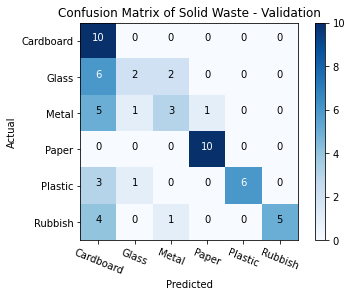

In [ ]:
import pandas as pd
from itertools import product
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_test_non_category = Y_valid
y_predict2= [ np.argmax(t) for t in ynew2 ]
cf2= confusion_matrix(y_test_non_category,y_predict2)
print(cf2)


print(np.bincount(y_predict2))

exp_series2= pd.Series(Y_valid)
pred_series2=pd.Series(y_predict2)

plt.imshow(cf2,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix of Solid Waste - Validation')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(set(exp_series2))) # length of classes
class_labels = ['Cardboard','Glass','Metal','Paper','Plastic','Rubbish']
tick_marks
plt.xticks(tick_marks,class_labels,rotation=-22)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf2.max() / 2.
for i,j in product(range(cf2.shape[0]),range(cf2.shape[1])):
    plt.text(j,i,format(cf2[i,j],'d'),horizontalalignment='center',color='white' if cf2[i,j] >thresh else 'black')
plt.savefig('/content/drive/My Drive/basura/mode_2400/matrix_confusion_validacion.png',dpi=100)
plt.show();